## TASK-3: Exploratory Data Analysis - Retail

### Importing Libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print("Libraries are imported..!")

Libraries are imported..!


### Importing Dataset 

In [45]:
data=pd.read_csv('SampleSuperstore.csv')
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


### Analyzing Dataset 

In [46]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [47]:
data.shape

(9994, 13)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [49]:
# computing number of rows
rows = len(data.axes[0])
# computing number of columns
cols = len(data.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  9994
Number of Columns:  13


In [50]:
#duplicate data
data.duplicated().sum()

17

In [51]:
#finding the null data
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [52]:
#finding pairwise correlation of each column
#while removing na and non numeric values
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [53]:
#dropping duplicates in the dataset
data=data.drop_duplicates()

In [54]:
#preprocessed data
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Exploratory Data Analysis 

<AxesSubplot:>

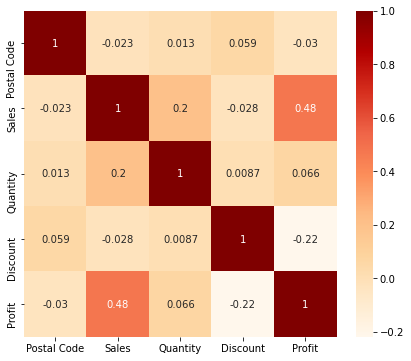

In [55]:
#plotting the correlation matrix
plt.figure(figsize=(7,6))
correlation=data.corr()
sns.heatmap(correlation,annot=True,cmap='OrRd')

### Pair Plot to analyze whole data 

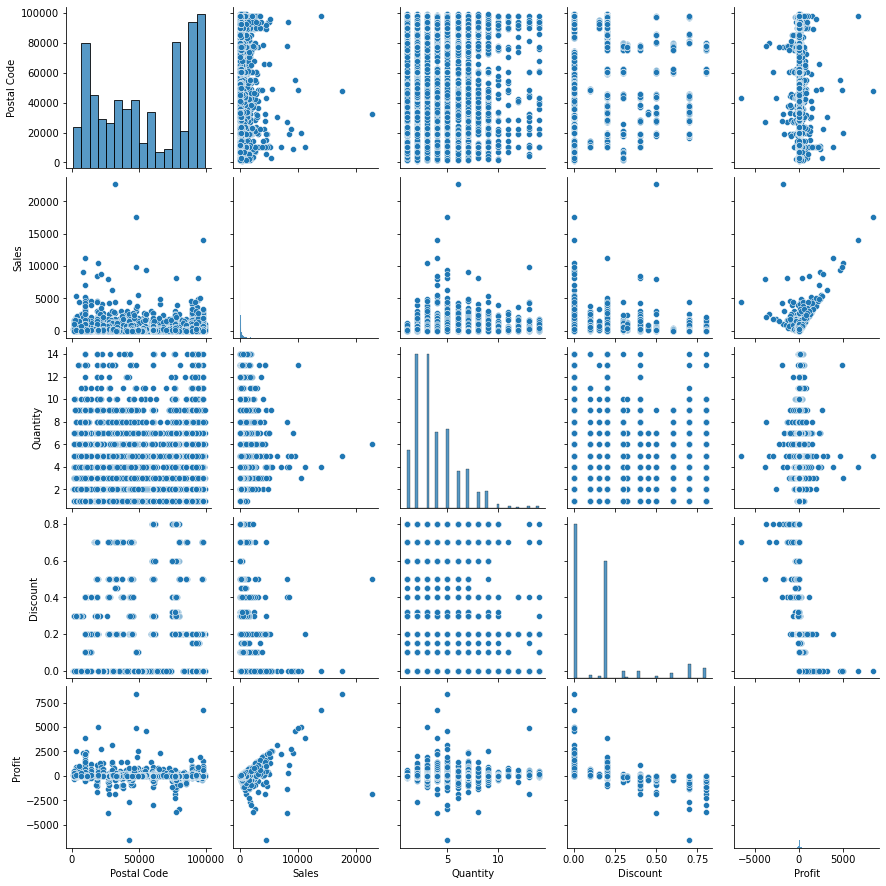

In [56]:
sns.pairplot(data)

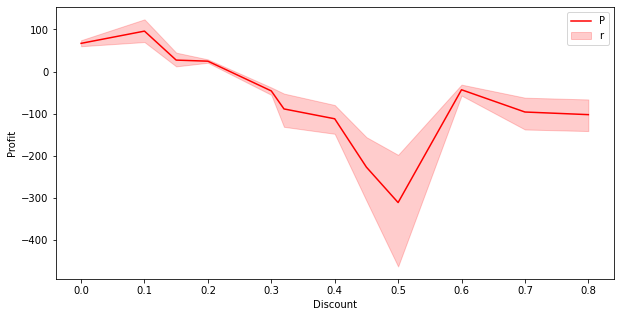

In [57]:
#plotting discount vs profit
plt.figure(figsize=(10,5))
sns.lineplot(x='Discount',y='Profit',data=data,color='red')
plt.legend('Profit')

### Distribution Of shipments based on different states

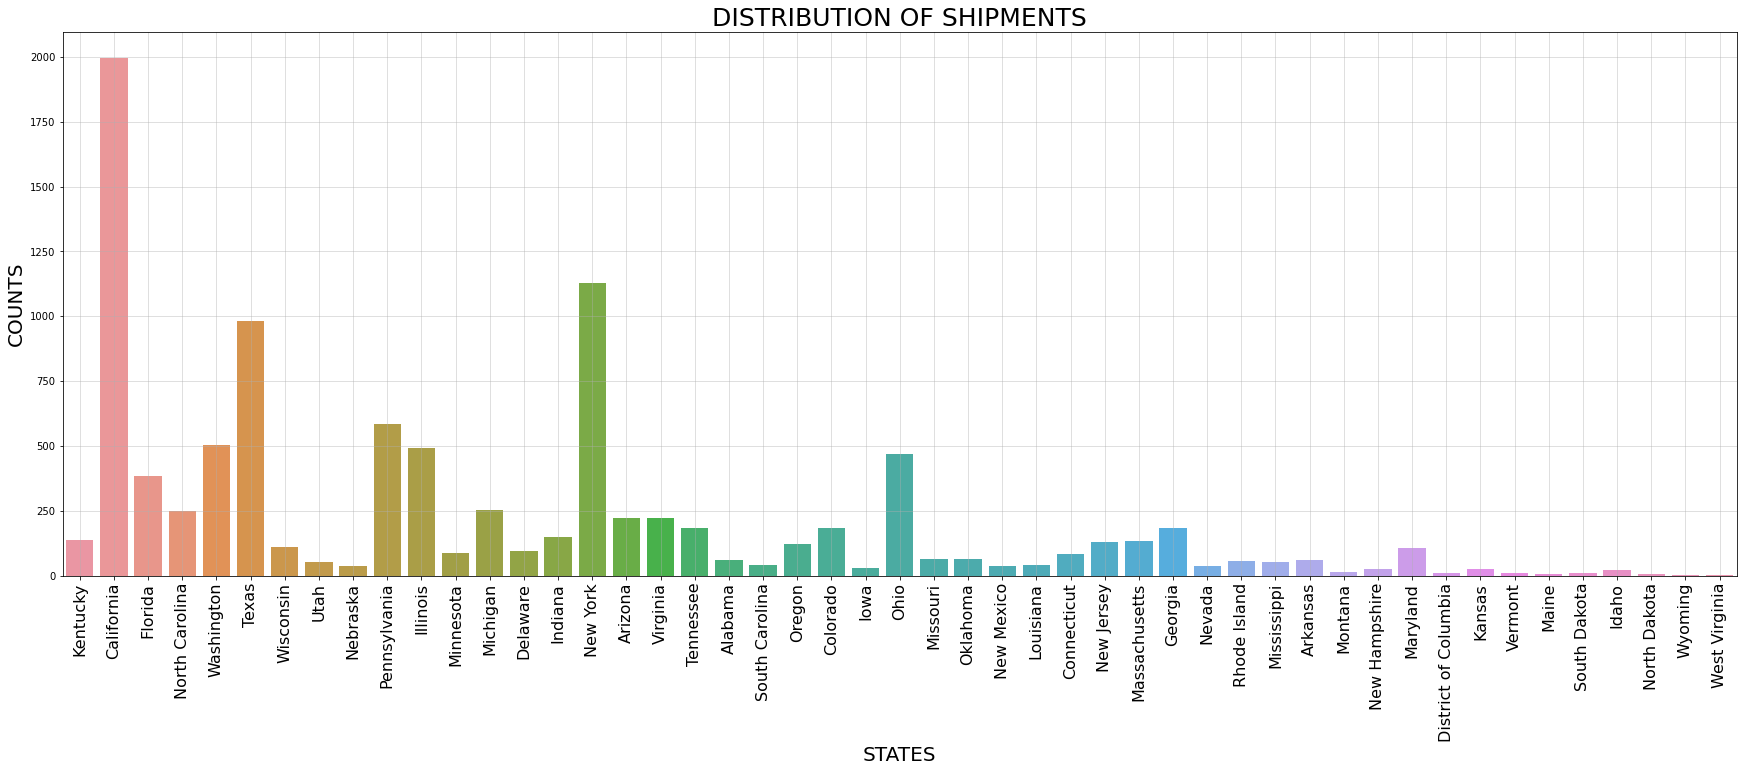

In [58]:
plt.figure(figsize=(30,10))
sns.countplot(data['State'])
plt.xticks(fontsize=16,rotation=90)
plt.ylabel('COUNTS',fontsize=20)
plt.xlabel('STATES',fontsize=20)
plt.title('DISTRIBUTION OF SHIPMENTS',fontsize=25);
plt.grid(alpha=0.5)
plt.show()

### Distribution of shipment based on categories/subcategories


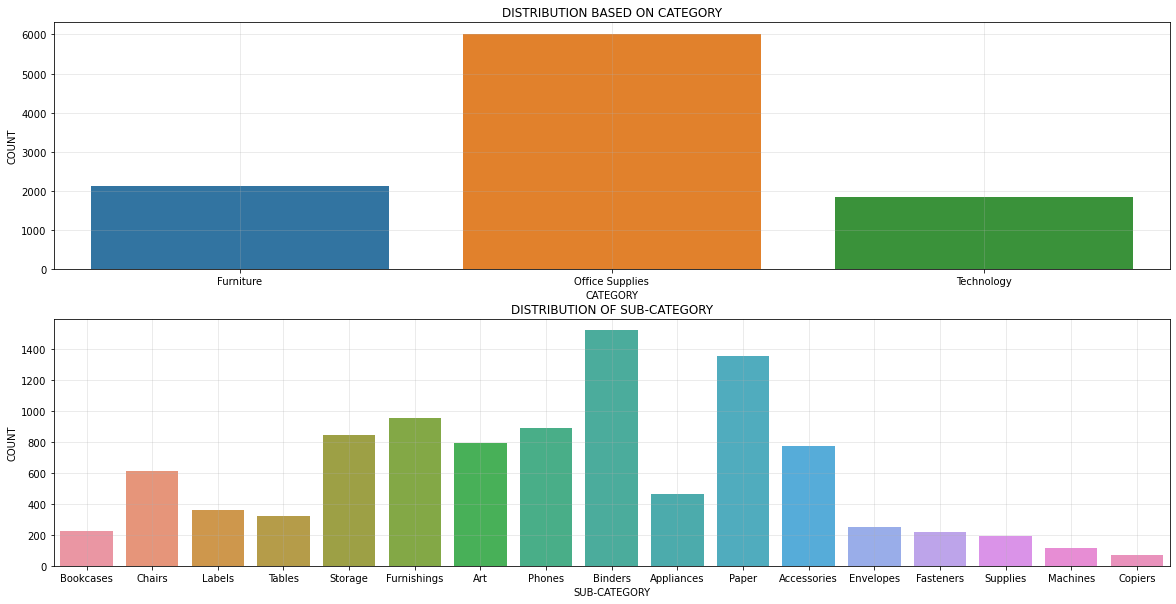

In [59]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.countplot('Category',data=data);
plt.title('DISTRIBUTION BASED ON CATEGORY')
plt.xlabel('CATEGORY')
plt.ylabel('COUNT')
plt.grid(alpha=0.3)
plt.subplot(2,1,2)
sns.countplot('Sub-Category',data=data);
plt.title('DISTRIBUTION OF SUB-CATEGORY')
plt.xlabel('SUB-CATEGORY')
plt.ylabel('COUNT')
plt.grid(alpha=0.3)
plt.show()

### Distribution plots

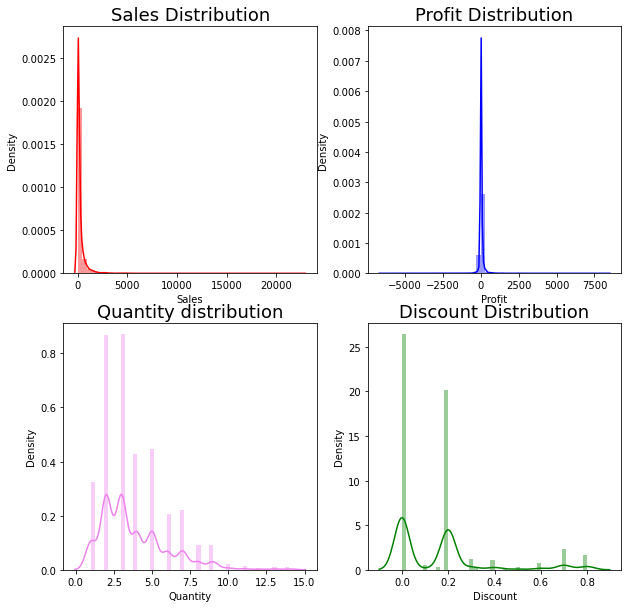

In [60]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (10,10))
sns.distplot(data['Sales'], color = 'red',  ax = axs[0][0])
sns.distplot(data['Profit'], color = 'blue',  ax = axs[0][1])
sns.distplot(data['Quantity'], color = 'violet',  ax = axs[1][0])
sns.distplot(data['Discount'], color = 'green',  ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 18)
axs[0][1].set_title('Profit Distribution', fontsize = 18)
axs[1][0].set_title('Quantity distribution', fontsize = 18)
axs[1][1].set_title('Discount Distribution', fontsize = 18)
plt.show()

### Profit distribution according to sales in different regions

In [61]:
C=data[data['Region']=='Central']
E=data[data['Region']=='East']
W=data[data['Region']=='West']
S=data[data['Region']=='South']

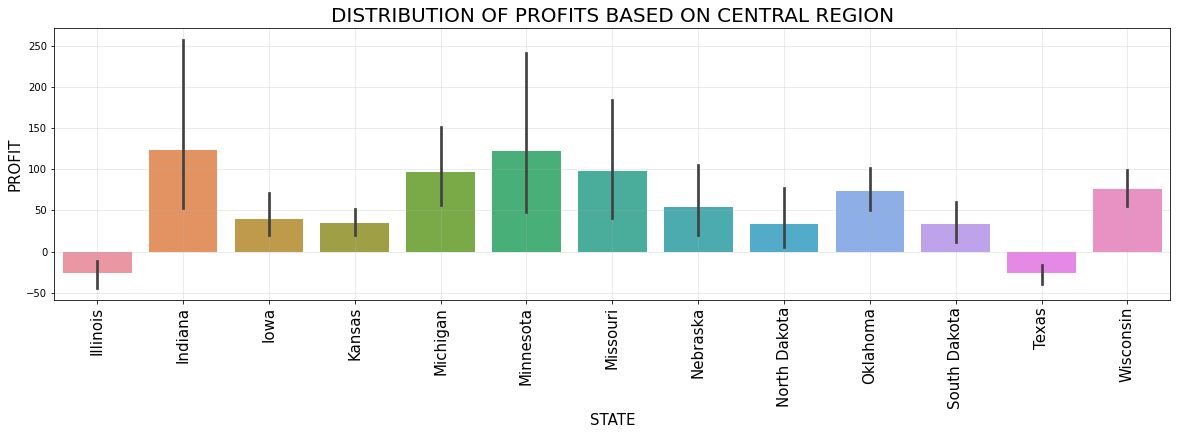

In [62]:
#central region
plt.figure(figsize=(20,5))
sns.barplot(x=C['State'].sort_values(ascending=True),y=C['Profit'])
plt.title('DISTRIBUTION OF PROFITS BASED ON CENTRAL REGION', fontsize=20)
plt.xticks(rotation=90, fontsize=15);
plt.xlabel('STATE',fontsize=15)
plt.ylabel('PROFIT',fontsize=15)
plt.grid(alpha=0.3)

Text(0, 0.5, 'PROFIT')

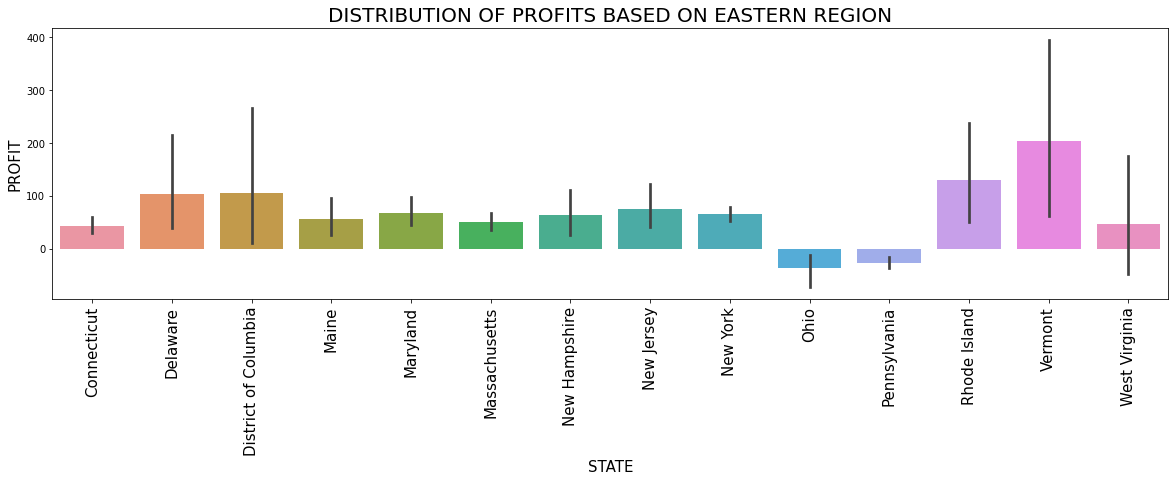

In [63]:
#eastern region
plt.figure(figsize=(20,5))
sns.barplot(x=E['State'].sort_values(ascending=True),y=E['Profit'])
plt.title('DISTRIBUTION OF PROFITS BASED ON EASTERN REGION', fontsize=20)
plt.xticks(rotation=90, fontsize=15);
plt.xlabel('STATE',fontsize=15)
plt.ylabel('PROFIT',fontsize=15)

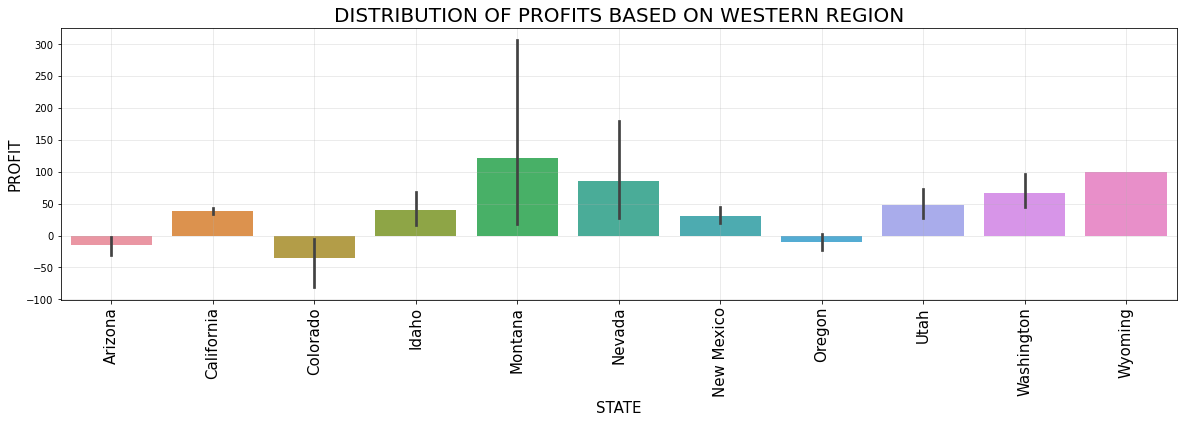

In [64]:
#western region
plt.figure(figsize=(20,5))
sns.barplot(x=W['State'].sort_values(ascending=True),y=W['Profit'])
plt.title('DISTRIBUTION OF PROFITS BASED ON WESTERN REGION', fontsize=20)
plt.xticks(rotation=90, fontsize=15);
plt.xlabel('STATE',fontsize=15)
plt.ylabel('PROFIT',fontsize=15)
plt.grid(alpha=0.3)

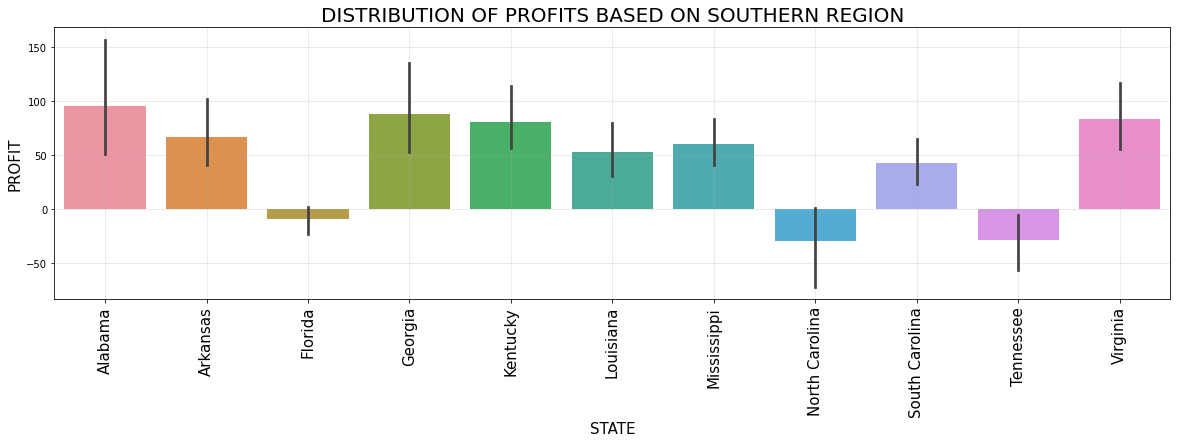

In [65]:
#southern region
plt.figure(figsize=(20,5))
sns.barplot(x=S['State'].sort_values(ascending=True),y=S['Profit'])
plt.title('DISTRIBUTION OF PROFITS BASED ON SOUTHERN REGION', fontsize=20)
plt.xticks(rotation=90, fontsize=15);
plt.xlabel('STATE',fontsize=15)
plt.ylabel('PROFIT',fontsize=15)
plt.grid(alpha=0.3)
plt.show()

### State wise analysis of Profit, Discount, Sale 

In [66]:
data_state= data.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
data_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,229.246629,0.072946,38.241878
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


### state wise sale analysis 

Text(0.5, 1.0, 'State wise analysis of Sale')

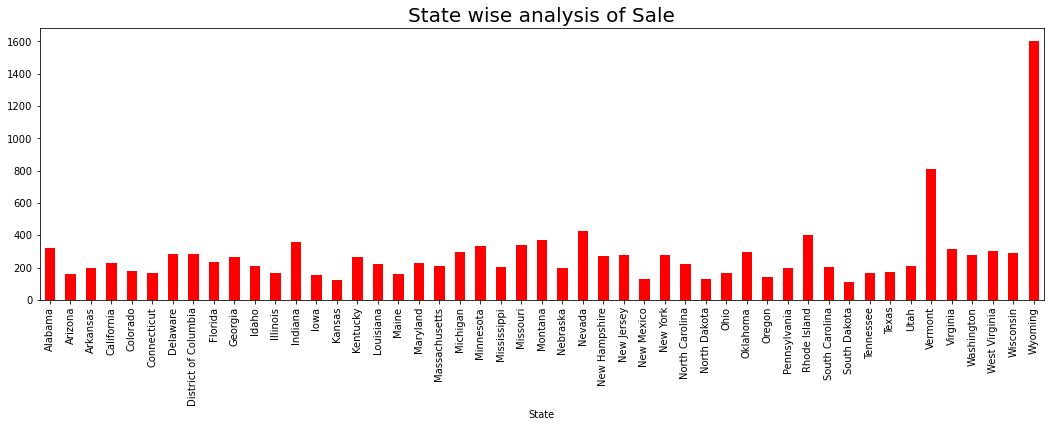

In [70]:
data_state['Sales'].plot(kind='bar',figsize = (18,5),color='red')
plt.title('State wise analysis of Sale',fontsize=20)



### CONCLUSION: 
#### Highest Sale - Wyoming
#### Lowest Sale - South Dakota

### State wise profit analysis 

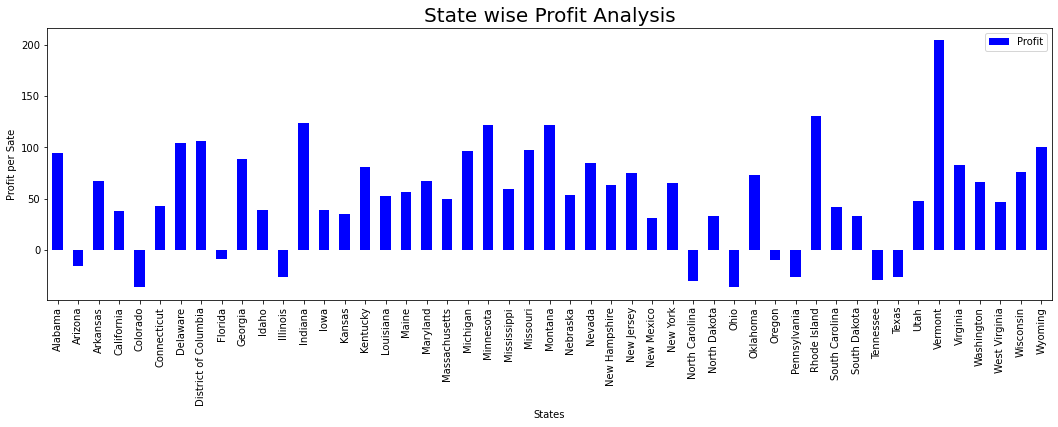

In [71]:
data_state[['Profit']].plot(kind = 'bar', figsize = (18,5), color='blue')
plt.title('State wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

### CONCLUSION:
#### Highest Profit-Vermont
#### Lowest Profit - Ohio

### state wise discount analysis 

Text(0.5, 1.0, 'State wise analysis of Discount')

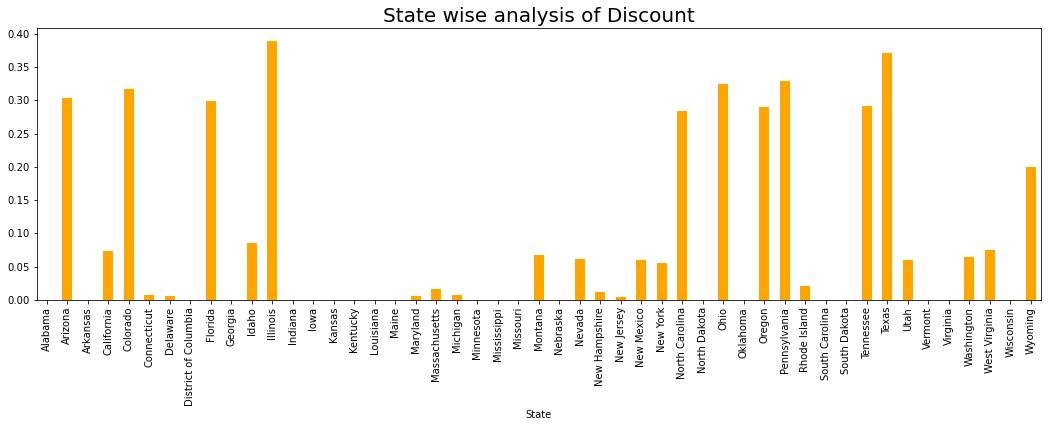

In [73]:
data_state['Discount'].plot(kind='bar',figsize=(18,5),color='orange')
plt.title('State wise analysis of Discount', fontsize=20)

### CONCLUSION:
#### Highest Discount providing state - Lllinois
#### Lowest Discount providing state - lowa,kansas etc(discount=0)

### Ship Mode wise sales, profit, discount 

array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

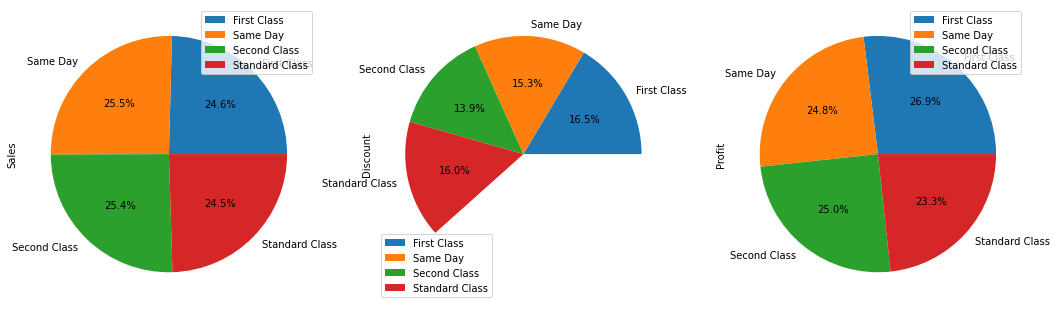

In [74]:
data_shipmode = data.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()
data_shipmode.plot.pie(subplots=True,figsize=(18, 20), autopct='%1.1f%%', labels = data_shipmode.index)

### CONCLUSION:
#### Profit and Discount is high in - First Class
#### Sales is high for - Same day ship

### Category wise sales, Discount, Profit analyse 

In [77]:
data_category = data.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
data_category

,Sales,Discount,Profit
Category,,,
Furniture,350.002981,0.174027,8.697740
Office Supplies,119.550107,0.157385,20.353403
Technology,452.709276,0.132323,78.752002


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

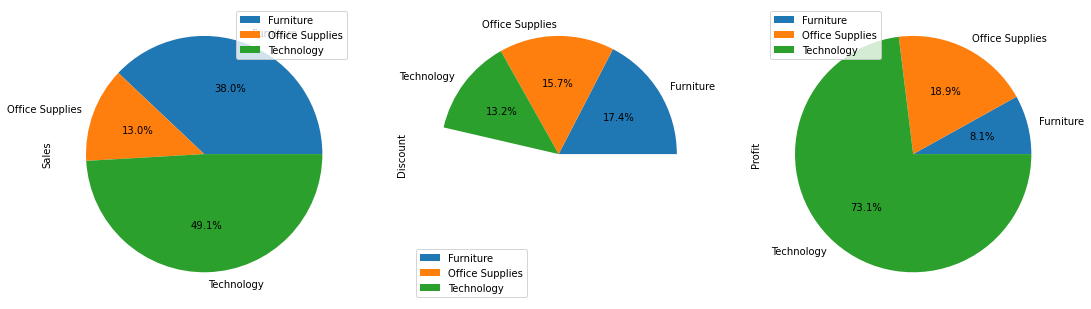

In [78]:
data_category.plot.pie(subplots=True, figsize=(18, 20), autopct='%1.1f%%', labels = data_category.index)

### CONCLUSION:
#### Maximun sales and Profit obtain in Technology.
#### Minimun profit obtain in Furniture

# FINAL CONCLUSION:

### 1) The areas which have the least profit can be taken into account and there discount can be increased so as to increase the sale as well as the profit simultaneously.
### 2)Top 3 cities where deals are Highest. - New York City , Los Angeles , Philadelphia
### 3)Wyoming has the lowest Number of deal but the highest amount of sales